In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
df = pd.read_csv(r"C:\Users\LENOVO\Desktop\SQL datasets\order.csv")

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,Segment,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,1/3/2013,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,Consumer,1/7/2013,Standard Class,Texas,Paper,0.2,1,6.0,0.34,2,16.0
1,Office Supplies,Naperville,United States,Phillina Ober,Avery,1/4/2013,CA-2011-112326,60540,Avery 508,Central,Home Office,1/8/2013,Standard Class,Illinois,Labels,0.2,1,4.0,0.36,3,12.0
2,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,1/4/2013,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,Home Office,1/8/2013,Standard Class,Illinois,Storage,0.2,1,-65.0,-0.24,3,273.0
3,Office Supplies,Naperville,United States,Phillina Ober,GBC,1/4/2013,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,Home Office,1/8/2013,Standard Class,Illinois,Binders,0.8,1,-5.0,-1.55,2,4.0
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,1/5/2013,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,Consumer,1/12/2013,Standard Class,Pennsylvania,Art,0.2,1,5.0,0.25,3,20.0


In [ ]:
#1. How many unique products and customers are there?

In [23]:
df["Customer Name"].nunique(), df["Product Name"].nunique()

(793, 1850)

In [ ]:
# 2. What are the most frequently purchased products?

In [35]:
df.groupby("Product Name")["Order ID"].count().reset_index(name = "Number of Purchases").max()

Product Name           netTALK DUO VoIP Telephone Service
Number of Purchases                                    48
dtype: object

In [ ]:
#3. What is the distribution of orders by **Category** and **Sub-Category**?

In [37]:
df.groupby("Category")["Order ID"].count()

Category
Furniture          2121
Office Supplies    6026
Technology         1847
Name: Order ID, dtype: int64

In [41]:
df.groupby("Sub-Category")["Order ID"].count()

Sub-Category
Accessories     775
Appliances      466
Art             796
Binders        1523
Bookcases       228
Chairs          617
Copiers          68
Envelopes       254
Fasteners       217
Furnishings     957
Labels          364
Machines        115
Paper          1370
Phones          889
Storage         846
Supplies        190
Tables          319
Name: Order ID, dtype: int64

In [47]:
df.groupby(["Category","Sub-Category"])["Order ID"].count()

Category         Sub-Category
Furniture        Bookcases        228
                 Chairs           617
                 Furnishings      957
                 Tables           319
Office Supplies  Appliances       466
                 Art              796
                 Binders         1523
                 Envelopes        254
                 Fasteners        217
                 Labels           364
                 Paper           1370
                 Storage          846
                 Supplies         190
Technology       Accessories      775
                 Copiers           68
                 Machines         115
                 Phones           889
Name: Order ID, dtype: int64

In [ ]:
#4. What is the total sales and total profit across all orders?

In [51]:
df[["Profit" ,"Sales"]].sum()

Profit     286347.0
Sales     2297354.0
dtype: float64

In [53]:
df.head()

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,Segment,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,1/3/2013,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,Consumer,1/7/2013,Standard Class,Texas,Paper,0.2,1,6.0,0.34,2,16.0
1,Office Supplies,Naperville,United States,Phillina Ober,Avery,1/4/2013,CA-2011-112326,60540,Avery 508,Central,Home Office,1/8/2013,Standard Class,Illinois,Labels,0.2,1,4.0,0.36,3,12.0
2,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,1/4/2013,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,Home Office,1/8/2013,Standard Class,Illinois,Storage,0.2,1,-65.0,-0.24,3,273.0
3,Office Supplies,Naperville,United States,Phillina Ober,GBC,1/4/2013,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,Home Office,1/8/2013,Standard Class,Illinois,Binders,0.8,1,-5.0,-1.55,2,4.0
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,1/5/2013,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,Consumer,1/12/2013,Standard Class,Pennsylvania,Art,0.2,1,5.0,0.25,3,20.0


In [ ]:
#5. Which products generate the most and least profit?

In [61]:
most_profit = df.groupby('Product Name')["Profit"].sum().idxmax()

In [75]:
least_profit = df.groupby('Product Name')["Profit"].sum().idxmin()

In [77]:
most_profit, least_profit

('Canon imageCLASS 2200 Advanced Copier',
 'Cubify CubeX 3D Printer Double Head Print')

In [ ]:
#6. Are there any products with negative profit (losses)?

In [89]:
negative_products = df[df['Profit'] < 0]
negative_products.shape[0]

1865

In [91]:
#7. What is the average profit margin (`Profit Ratio`) by Category?

In [95]:
df.groupby("Category")["Profit Ratio"].mean()

Category
Furniture          0.038798
Office Supplies    0.138302
Technology         0.156416
Name: Profit Ratio, dtype: float64

In [97]:
#8. Which customers have generated the most revenue?

In [105]:
df.groupby("Customer Name")["Sales"].sum().idxmax()

'Sean Miller'

In [ ]:
#9. Which segment (Consumer, Corporate, Home Office) spends the most?

In [111]:
df.groupby("Segment")["Sales"].sum().idxmax()

'Consumer'

In [ ]:
#10. Are there any customers who order frequently but bring in low profit?

In [113]:
df.head()

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,Segment,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales
0,Office Supplies,Houston,United States,Darren Powers,Message Book,1/3/2013,CA-2011-103800,77095,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Central,Consumer,1/7/2013,Standard Class,Texas,Paper,0.2,1,6.0,0.34,2,16.0
1,Office Supplies,Naperville,United States,Phillina Ober,Avery,1/4/2013,CA-2011-112326,60540,Avery 508,Central,Home Office,1/8/2013,Standard Class,Illinois,Labels,0.2,1,4.0,0.36,3,12.0
2,Office Supplies,Naperville,United States,Phillina Ober,SAFCO,1/4/2013,CA-2011-112326,60540,SAFCO Boltless Steel Shelving,Central,Home Office,1/8/2013,Standard Class,Illinois,Storage,0.2,1,-65.0,-0.24,3,273.0
3,Office Supplies,Naperville,United States,Phillina Ober,GBC,1/4/2013,CA-2011-112326,60540,GBC Standard Plastic Binding Systems Combs,Central,Home Office,1/8/2013,Standard Class,Illinois,Binders,0.8,1,-5.0,-1.55,2,4.0
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,1/5/2013,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,Consumer,1/12/2013,Standard Class,Pennsylvania,Art,0.2,1,5.0,0.25,3,20.0


In [121]:
customer_stats = df.groupby('Customer Name').agg(
    OrderCount=('Order ID', 'count'),
    TotalProfit=('Profit', 'sum'),
    AvgProfitPerOrder=('Profit', 'mean')
).reset_index()

In [123]:
customer_stats

,Customer Name,OrderCount,TotalProfit,AvgProfitPerOrder
0,Aaron Bergman,6,129.0,21.500000
1,Aaron Hawkins,11,364.0,33.090909
2,Aaron Smayling,10,-254.0,-25.400000
3,Adam Bellavance,18,2055.0,114.166667
4,Adam Hart,20,283.0,14.150000
5,Adam Shillingsburg,25,63.0,2.520000
6,Adrian Barton,20,5445.0,272.250000
7,Adrian Hane,16,-2.0,-0.125000
8,Adrian Shami,3,22.0,7.333333
9,Aimee Bixby,12,314.0,26.166667


In [125]:
freq_threshold = 10  
profit_threshold = 1000  

frequent_low_profit_customers = customer_stats[
    (customer_stats['OrderCount'] >= freq_threshold) &
    (customer_stats['TotalProfit'] < profit_threshold)
]

In [131]:
frequent_low_profit_customers

,Customer Name,OrderCount,TotalProfit,AvgProfitPerOrder
1,Aaron Hawkins,11,364.0,33.090909
2,Aaron Smayling,10,-254.0,-25.400000
4,Adam Hart,20,283.0,14.150000
5,Adam Shillingsburg,25,63.0,2.520000
7,Adrian Hane,16,-2.0,-0.125000
9,Aimee Bixby,12,314.0,26.166667
10,Alan Barnes,14,220.0,15.714286
14,Alan Schoenberger,13,721.0,55.461538
15,Alan Shonely,13,34.0,2.615385
16,Alejandro Ballentine,14,263.0,18.785714


In [133]:
#11. What are the top-performing states or cities by sales?

In [155]:
top_performing_city = df.groupby("City")["Sales"].sum().sort_values(ascending = False)

In [161]:
top_performing_city.head(10).reset_index()

,City,Sales
0,New York City,256397.0
1,Los Angeles,175857.0
2,Seattle,119552.0
3,San Francisco,112690.0
4,Philadelphia,109085.0
5,Houston,64504.0
6,Chicago,48540.0
7,San Diego,47521.0
8,Jacksonville,44712.0
9,Springfield,43052.0


In [163]:
#12. Which region has the highest average sales per order?

In [173]:
df.groupby("Region")["Sales"].mean().idxmax()

'South'

In [ ]:
#13. Which manufacturers dominate in specific regions?

In [191]:
region_manufacturer_counts = df.groupby(["Region","Manufacturer"])["Order ID"].count().reset_index(name='OrderCount')

In [193]:
top_manufacturers = region_manufacturer_counts.loc[region_manufacturer_counts.groupby("Region")["OrderCount"].idxmax()]

In [195]:
top_manufacturers

,Region,Manufacturer,OrderCount
110,Central,Other,418
284,East,Other,565
455,South,Other,319
629,West,Other,591


In [ ]:
#14. What are the monthly or yearly sales trends?

In [199]:
from datetime import datetime 

In [209]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [227]:
df["Year"] = df['Order Date'].dt.year
df["Month"] = df['Order Date'].dt.month

In [219]:
yearlysales = df.groupby('Year')["Sales"].sum()

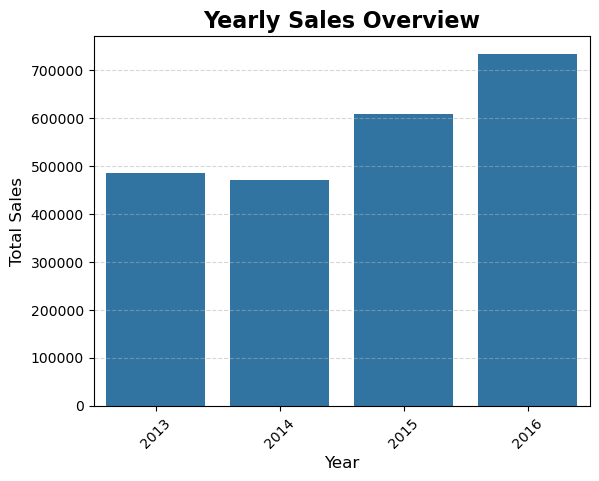

In [225]:
sns.barplot(yearlysales)
plt.title('Yearly Sales Overview', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

In [239]:
monthlymap = { 1 : "Jan", 2 : "Feb", 3: "Mar", 4:"Apr", 5:"May",6:'Jun',7:"Jul",8:'Aug',9:"Sept",10:"Oct",11:"Nov",12:"Dec"}

In [241]:
df["Month_Name"] = df["Month"].map(monthlymap)

In [259]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df["Month_Name"] = pd.Categorical(df["Month_Name"], categories=month_order, ordered=True)

In [261]:
monthlysales = df.groupby('Month_Name')["Sales"].sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30776\3538650660.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthlysales = df.groupby('Month_Name')["Sales"].sum()


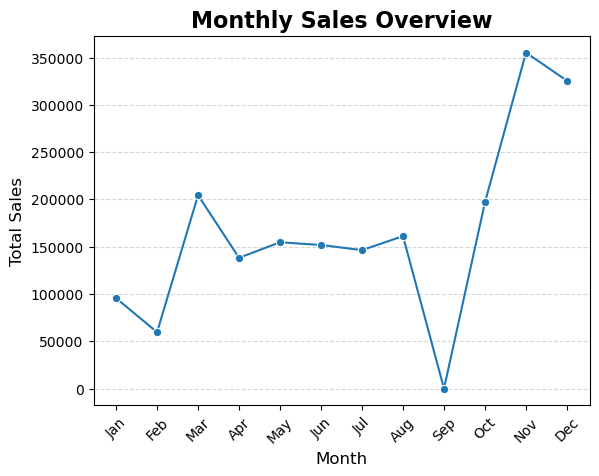

In [265]:
sns.lineplot(monthlysales,  marker='o')
plt.title('Monthly Sales Overview', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

In [ ]:
##15. How does profit vary across months/seasons?

In [282]:
Monthly_profit = df.groupby("Month_Name")["Profit"].sum()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30776\1188074982.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Monthly_profit = df.groupby("Month_Name")["Profit"].sum()


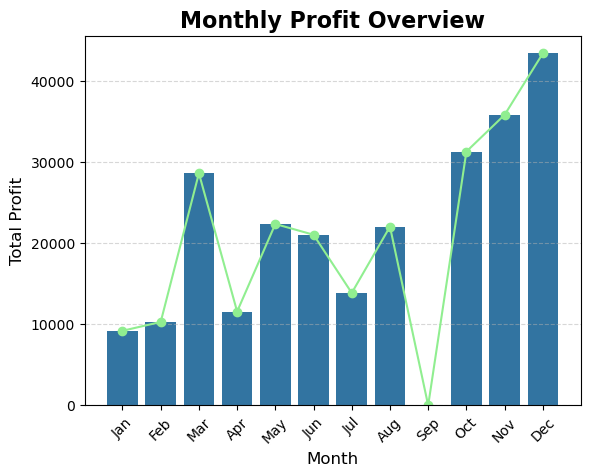

In [296]:
sns.barplot(Monthly_profit)
plt.plot(Monthly_profit, color='lightgreen', marker='o', label='Trend Line')
plt.title('Monthly Profit Overview', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

In [ ]:
#16. Which months experience the highest order volumes?

In [302]:
df.groupby("Month_Name")["Order ID"].count().reset_index(name = "Orders").max()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_30776\4115168202.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("Month_Name")["Order ID"].count().reset_index(name = "Orders").max()


Month_Name     Dec
Orders        1474
dtype: object

In [ ]:
#17. What is the most common shipping mode?

In [310]:
df.groupby("Ship Mode")["Order ID"].count().idxmax()

'Standard Class'

In [312]:
#18. How does shipping time (Order Date vs. Ship Date) vary by Region?

In [316]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"])

In [326]:
df["Shipping Days"] =  (df["Ship Date"] - df["Order Date"]).dt.days

In [332]:
shipping_days_by_region = df.groupby("Region")["Shipping Days"].mean()

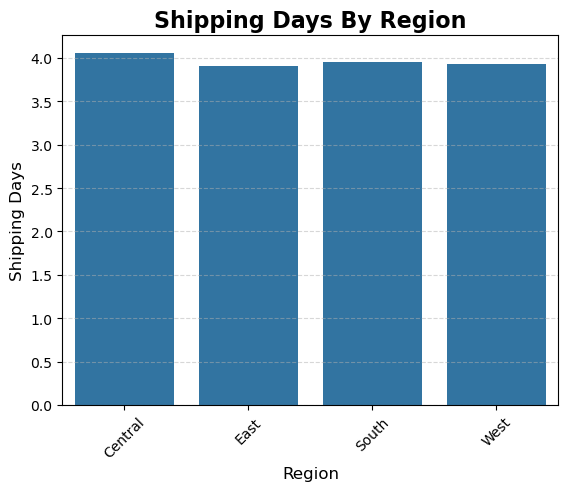

In [336]:
sns.barplot(shipping_days_by_region)
plt.title('Shipping Days By Region', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('Shipping Days', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)

In [ ]:
##19. Are there delays between Order and Ship Date?

In [338]:
delay_threshold = 5
delayed_orders = df[df['Shipping Days'] > delay_threshold]

In [340]:
delayed_orders

,Category,City,Country,Customer Name,Manufacturer,Order Date,Order ID,Postal Code,Product Name,Region,Segment,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Profit Ratio,Quantity,Sales,Year,Month,Month_Name,Shipping Days
4,Office Supplies,Philadelphia,United States,Mick Brown,Avery,2013-01-05,CA-2011-141817,19143,Avery Hi-Liter EverBold Pen Style Fluorescent ...,East,Consumer,2013-01-12,Standard Class,Pennsylvania,Art,0.20,1,5.0,0.25,3,20.0,2013,1,Jan,7
43,Technology,Jonesboro,United States,Hunter Lopez,Apple,2013-01-20,US-2011-147627,72401,Apple iPhone 5C,South,Consumer,2013-01-26,Standard Class,Arkansas,Phones,0.00,1,182.0,0.26,7,700.0,2013,1,Jan,6
44,Office Supplies,Jonesboro,United States,Hunter Lopez,Newell,2013-01-20,US-2011-147627,72401,Newell 351,South,Consumer,2013-01-26,Standard Class,Arkansas,Art,0.00,1,7.0,0.29,7,23.0,2013,1,Jan,6
45,Furniture,Jonesboro,United States,Hunter Lopez,Eldon,2013-01-20,US-2011-147627,72401,"Eldon Expressions Desk Accessory, Wood Pencil ...",South,Consumer,2013-01-26,Standard Class,Arkansas,Furnishings,0.00,1,12.0,0.30,4,39.0,2013,1,Jan,6
46,Office Supplies,Jonesboro,United States,Hunter Lopez,Newell,2013-01-20,US-2011-147627,72401,Newell 327,South,Consumer,2013-01-26,Standard Class,Arkansas,Art,0.00,1,2.0,0.27,3,7.0,2013,1,Jan,6
47,Office Supplies,Jonesboro,United States,Hunter Lopez,Staple envelope,2013-01-20,US-2011-147627,72401,Staple envelope,South,Consumer,2013-01-26,Standard Class,Arkansas,Envelopes,0.00,1,11.0,0.47,3,23.0,2013,1,Jan,6
48,Furniture,Jonesboro,United States,Hunter Lopez,Hon,2013-01-20,US-2011-147627,72401,Hon 4700 Series Mobuis Mid-Back Task Chairs wi...,South,Consumer,2013-01-26,Standard Class,Arkansas,Chairs,0.00,1,224.0,0.21,3,1068.0,2013,1,Jan,6
51,Office Supplies,Westland,United States,Xylona Preis,Eldon,2013-01-20,CA-2011-167927,48185,Eldon Fold 'N Roll Cart System,Central,Consumer,2013-01-26,Standard Class,Michigan,Storage,0.00,1,4.0,0.29,1,14.0,2013,1,Jan,6
52,Furniture,Westland,United States,Xylona Preis,Eldon,2013-01-20,CA-2011-167927,48185,Eldon ClusterMat Chair Mat with Cordless Antis...,Central,Consumer,2013-01-26,Standard Class,Michigan,Furnishings,0.00,1,30.0,0.11,3,273.0,2013,1,Jan,6
53,Office Supplies,Westland,United States,Xylona Preis,Acco,2013-01-20,CA-2011-167927,48185,"Acco Pressboard Covers with Storage Hooks, 9 1...",Central,Consumer,2013-01-26,Standard Class,Michigan,Binders,0.00,1,9.0,0.47,5,19.0,2013,1,Jan,6


In [342]:
delay_percent =  (len(delayed_orders)/len(df)) * 100

In [344]:
delay_percent

18.250950570342205

In [350]:
print(f"Percentage delay of order is {delay_percent:.2f} %")

Percentage delay of order is 18.25 %


In [ ]:
#20. Which Sub-Categories have the highest number of records (`Number of Records`)?

In [354]:
df.groupby("Sub-Category")["Number of Records"].count().idxmax()

'Binders'

In [ ]:
#21. Are there correlations between **Discount**, **Quantity**, and **Profit**?

In [356]:
df[["Discount","Quantity","Profit"]].corr()

,Discount,Quantity,Profit
Discount,1.000000,0.008623,-0.219497
Quantity,0.008623,1.000000,0.066271
Profit,-0.219497,0.066271,1.000000


In [358]:
"There's no correlation Between discount, quantity and profit as seen from the correlation matrix"

"There's no correlation Between discount, quantity and profit as seen from the correlation matrix"

In [ ]:
#22. Does offering a high discount improve sales or reduce profit?

In [373]:
high_discount_threshold = 0.20  # 20%
df['High_Discount'] = df['Discount'] > high_discount_threshold

In [385]:
summary = df.groupby('High_Discount').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'count'  # number of orders
}).reset_index()
summary['Average_Sales_Per_Order'] = summary['Sales'] / summary['Order ID']
summary['Average_Profit_Per_Order'] = summary['Profit'] / summary['Order ID']

summary 


,High_Discount,Sales,Profit,Order ID,Average_Sales_Per_Order,Average_Profit_Per_Order
0,False,1934592.0,421731.0,8601,224.926404,49.032787
1,True,362762.0,-135384.0,1393,260.417803,-97.188801


In [379]:
"It sort of improves sales but totally kills the profit"

'It sort of improves sales but totally kills the profit'

In [ ]:
#23. What is the relationship between quantity ordered and sales/profit?

In [389]:
corr_sales = df['Quantity'].corr(df['Sales'])
corr_profit = df['Quantity'].corr(df['Profit'])
corr_sales, corr_profit

(0.20078845213263663, 0.0662713236009183)

In [391]:
"There's a slight positive linear relationship between quantity and sales", "No relationship between quantity and profit"

("There's a slight positive linear relationship between quantity and sales",
 'No relationship between quantity and profit')

In [ ]:
#24. Which products have high sales but low profit margins?

In [395]:
product_summary = df.groupby('Product Name').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

product_summary['Profit_Margin'] = product_summary['Profit'] / product_summary['Sales']

In [401]:
high_sales_threshold = product_summary['Sales'].quantile(0.75)
low_margin_threshold = product_summary['Profit_Margin'].quantile(0.25)

high_sales_low_margin = product_summary[
    (product_summary['Sales'] >= high_sales_threshold) &
    (product_summary['Profit_Margin'] <= low_margin_threshold)
]

high_sales_low_margin.sort_values(by='Sales', ascending=False)

,Product Name,Sales,Profit,Profit_Margin
444,Cisco TelePresence System EX90 Videoconferenci...,22638.0,-1811.0,-0.079998
786,HON 5400 Series Task Chairs for Big and Tall,21870.0,1.0,0.000046
688,GBC Ibimaster 500 Manual ProClick Binding System,19026.0,763.0,0.040103
683,GBC DocuBind P400 Electric Binding System,17965.0,-1879.0,-0.104592
813,High Speed Automatic Electric Letter Opener,17031.0,-261.0,-0.015325
985,Lexmark MX611dhe Monochrome Laser Printer,16830.0,-4590.0,-0.272727
1043,Martin Yale Chadless Opener Electric Letter Op...,16656.0,-1300.0,-0.078050
1351,"Riverside Palais Royal Lawyers Bookcase, Royal...",15611.0,-669.0,-0.042854
368,Bretford Rectangular Conference Table Tops,12997.0,-328.0,-0.025237
769,Global Troy Executive Leather Low-Back Tilter,12976.0,951.0,0.073289


In [ ]:
#25. Is there a correlation between **Sales** and **Profit Ratio**?

In [360]:
df[["Sales","Profit Ratio"]].corr()

,Sales,Profit Ratio
Sales,1.000000,0.003414
Profit Ratio,0.003414,1.000000


In [362]:
"No correlation"

'No correlation'